Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
def do_classification(dataset):
    # creating the models

    #clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    
    models = [(LogisticRegression(), 'Logistic Regression'),
        (GaussianNB(), 'Naive Bayes'),
        (svm.LinearSVC(C=1.0), 'Linear SVM'),
        (svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=True), 'SVM with RBF kernel'),
        (RandomForestClassifier(n_estimators=100), 'Random Forest'),
        (KNeighborsClassifier(n_neighbors=8), 'KNN'),
        (DecisionTreeClassifier(max_depth=5), 'Decision Tree'),
        (AdaBoostClassifier(), 'AdaBoost'),
        (LinearDiscriminantAnalysis(), 'Linear Discriminant Analysis'),
        (QuadraticDiscriminantAnalysis(), 'Quadratic Discriminant Analysis')]
    
    # applying the models
    n_folds = 10
    k_fold = cross_validation.KFold(n=len(dataset), n_folds=n_folds, shuffle=False, random_state=None)
    accuracy = {}
    for train_index, test_index in k_fold:
        X_train = dataset[train_index,:-1]
        y_train = dataset[train_index,-1]
        X_test = dataset[test_index,:-1]
        y_test = dataset[test_index,-1]

        for clf, name in models:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy_percent = 100 * sk.metrics.accuracy_score(y_test, y_pred) / n_folds
            if name not in accuracy:
                accuracy[name] = accuracy_percent
            else:
                accuracy[name] += accuracy_percent

    print('\n')
    for key, value in accuracy.items():
        print(key, ':', round(value,2))

In [3]:
def plot_TSNE(data, labels):
    tsne_model = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    points = tsne_model.fit_transform(data)
    df = pd.DataFrame(data=np.column_stack([points,labels]), columns=["x","y","class"])
    sns.lmplot("x", "y", data=df, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
    #sns.plt.plot(figsize=(20, 20))
    sns.plt.show()

In [4]:
def plot_PCA(data, labels):
    pca = PCA(n_components=2)
    pca.fit(data)
    #print(pca.explained_variance_ratio_)
    data = pca.transform(data)
    df = pd.DataFrame(data=np.column_stack([data,labels]), columns=["x","y","class"])
    sns.lmplot("x", "y", data=df, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
    sns.plt.show()

In [5]:
def apply(filename):
    original_dataset = pd.read_csv(filename)
    dataset = original_dataset.ix[:,:-1]
    to_be_deleted = []
    for idx,item in enumerate(dataset.as_matrix()):
        if np.isnan(item).any():
            to_be_deleted.append(idx)
    dataset = dataset.drop(to_be_deleted)
    dataset = dataset.sample(n=10000, replace=False)
    
    #Adding label and swapping 50% of winners and losers
    dataset['label'] = np.zeros([len(dataset),1])
    dt = dataset.as_matrix()
    idx = np.random.choice(len(dt), int(len(dt)/2), replace=False)
    tf = math.floor(dt.shape[1]/2)
    tmp = dt[idx,tf:2*tf]
    dt[idx,tf:2*tf] = dt[idx,:tf]
    dt[idx,:tf] = tmp
    dt[idx,-1] = 1
    
    # Standard Normalization (x-mean(x) / std(x))
    x = dataset.ix[:,:-1].values #returns a numpy array
    min_max_scaler = preprocessing.StandardScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataset.loc[:,:-1] = pd.DataFrame(x_scaled).values
    
    #Now dataset is ready for classification
    do_classification(dataset.as_matrix())
    
    dtt = dataset.sample(n=500, replace=False)
    plot_TSNE(dtt.ix[:,:dtt.shape[1]-2], dtt['label'])
    
    plot_PCA(dataset, dataset['label'])

In [10]:
a

,287.8,3.52,213.54,354.76,99.9063561542,2.85475042692,49.113810685,71.7503616716,266.6,3.08,184.04,325.52,138.592366312,2.35065948193,36.8400108578,95.4605971069,2762.0
0,371.88,3.26,212.98,354.22,124.476350,2.105802,34.355983,79.249136,373.10,3.04,226.46,326.38,81.590024,2.298347,20.893693,52.474733,2451.0
1,297.28,4.14,219.24,351.32,164.964995,3.153791,42.956564,73.884921,325.86,3.26,192.74,344.88,58.357197,2.699333,40.806745,77.384789,2443.0
2,299.32,3.70,194.16,311.64,131.284704,2.332381,33.924952,69.651952,305.84,3.88,209.64,356.72,111.006966,2.965400,30.777628,70.271001,2619.0
3,363.58,3.90,209.36,330.52,164.084898,2.833373,42.226371,74.099323,349.96,2.96,189.50,324.52,105.903722,2.427015,38.538137,82.387849,2456.0
4,272.70,4.54,237.30,345.92,145.393879,3.549422,43.730584,86.880985,320.76,4.04,231.62,352.90,120.986687,2.953371,43.336008,58.033060,2773.0
5,380.86,3.40,217.00,333.12,112.662658,2.734959,29.542038,90.885057,363.56,3.76,232.06,326.78,82.899279,2.249978,8.837783,71.825940,2472.0
6,260.20,3.84,217.24,324.10,83.038377,2.981677,48.075382,77.250657,326.02,3.76,204.48,317.50,166.081214,2.981677,33.012688,63.762277,2461.0
7,356.52,2.98,199.56,318.00,70.733907,1.997398,52.661280,59.203040,348.42,4.14,263.54,343.40,108.332957,2.713374,38.949639,68.912350,2424.0
8,222.10,4.28,222.48,373.02,100.420974,2.806706,47.780933,73.131755,380.70,3.84,192.00,350.12,128.295113,2.834502,32.053268,62.732716,2523.0
9,402.38,3.14,200.34,347.40,121.512228,2.549196,34.187986,66.598378,330.54,3.62,204.34,345.78,26.872484,2.683580,25.051834,55.124601,2560.0


# Classification results on timeline dataset (10000 samples) from League of Legend games

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

SVM with RBF kernel : 53.4
AdaBoost : 52.22
Naive Bayes : 54.55
Linear SVM : 54.36
Linear Discriminant Analysis : 54.39
Decision Tree : 52.25
Logistic Regression : 54.39
KNN : 51.92
Random Forest : 53.77
Quadratic Discriminant Analysis : 53.03


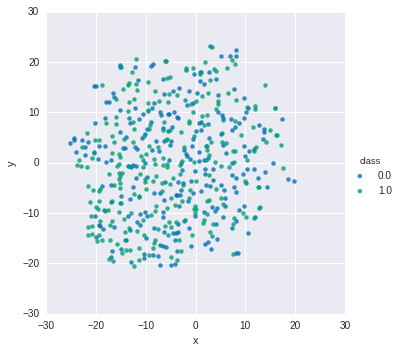

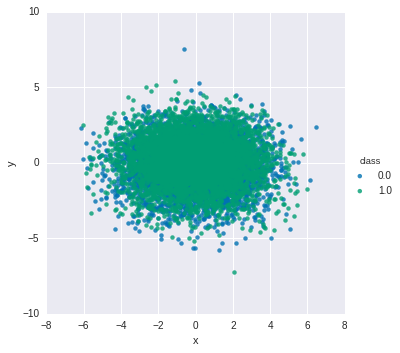

In [6]:
apply('timeline_game_dataset_0_10.csv')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

SVM with RBF kernel : 57.21
AdaBoost : 56.69
Naive Bayes : 56.42
Linear SVM : 57.53
Linear Discriminant Analysis : 57.59
Decision Tree : 56.76
Logistic Regression : 57.59
KNN : 53.4
Random Forest : 56.65
Quadratic Discriminant Analysis : 54.44


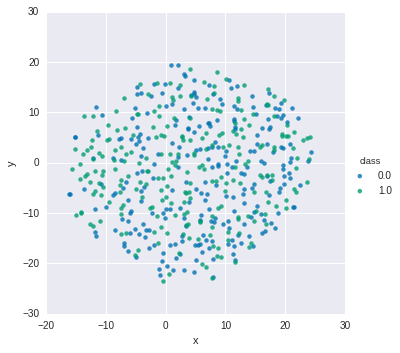

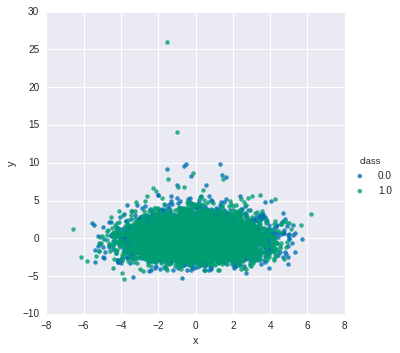

In [7]:
apply('timeline_game_dataset_10_20.csv')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

SVM with RBF kernel : 61.46
AdaBoost : 61.18
Naive Bayes : 60.95
Linear SVM : 62.06
Linear Discriminant Analysis : 62.12
Decision Tree : 60.61
Logistic Regression : 62.06
KNN : 55.82
Random Forest : 60.86
Quadratic Discriminant Analysis : 60.61


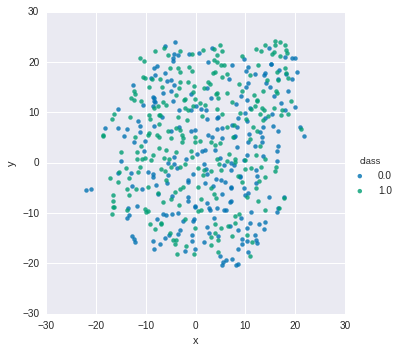

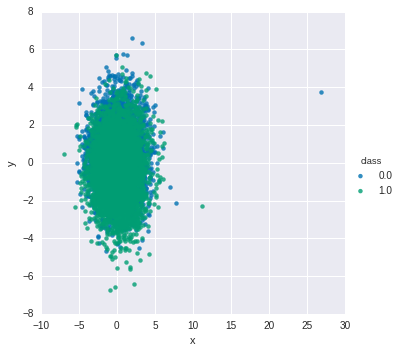

In [8]:
apply('timeline_game_dataset_20_30.csv')